In [283]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# data Visualization
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.ticker as mtick
py.init_notebook_mode(connected=True)

from sklearn import tree
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score, precision_recall_curve,accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, ElasticNet, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn Processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.metrics import confusion_matrix,classification_report


# untuk hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [91]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("hotel_bookings.csv")


In [92]:
df = df.iloc[:5000] 
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Resort Hotel,1,212,2016,April,16,11,2,5,2,0.0,0,HB,PRT,Groups,Direct,0,0,0,D,D,0,Non Refund,273.0,NaN,0,Transient,76.05,0,0,Canceled,2015-10-16
4996,Resort Hotel,1,212,2016,April,16,11,2,5,2,0.0,0,HB,PRT,Groups,Direct,0,0,0,D,D,0,Non Refund,273.0,NaN,0,Transient,76.05,0,0,Canceled,2015-10-16
4997,Resort Hotel,1,212,2016,April,16,11,2,5,2,0.0,0,HB,PRT,Groups,Direct,0,0,0,A,A,0,Non Refund,273.0,NaN,0,Transient,67.05,0,0,Canceled,2015-10-16
4998,Resort Hotel,1,212,2016,April,16,11,2,5,2,0.0,0,HB,PRT,Groups,Direct,0,0,0,A,A,0,Non Refund,273.0,NaN,0,Transient,67.05,0,0,Canceled,2015-10-16


### FEATURE YANG DI PAKAI ['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']

### Remove feature yang tak dipakai

In [93]:
df.drop(['lead_time','arrival_date_year', 'arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','assigned_room_type','agent','company','adr','reservation_status','reservation_status_date'],axis=1, inplace=True)


In [94]:
df

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4996,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4997,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

In [96]:
df.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        2
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

In [97]:
df.dropna(inplace=True)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        4998 non-null   object 
 1   is_canceled                  4998 non-null   int64  
 2   adults                       4998 non-null   int64  
 3   children                     4998 non-null   float64
 4   babies                       4998 non-null   int64  
 5   meal                         4998 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               4998 non-null   object 
 8   distribution_channel         4998 non-null   object 
 9   reserved_room_type           4998 non-null   object 
 10  booking_changes              4998 non-null   int64  
 11  deposit_type                 4998 non-null   object 
 12  days_in_waiting_list         4998 non-null   int64  
 13  customer_type     

In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,4998.0,0.459584,0.498414,0.0,0.0,0.0,1.0,1.0
adults,4998.0,1.970388,1.566332,0.0,2.0,2.0,2.0,55.0
children,4998.0,0.115646,0.444916,0.0,0.0,0.0,0.0,10.0
babies,4998.0,0.014806,0.122433,0.0,0.0,0.0,0.0,2.0
booking_changes,4998.0,0.206883,0.612080,0.0,0.0,0.0,0.0,17.0
days_in_waiting_list,4998.0,1.772709,13.548022,0.0,0.0,0.0,0.0,122.0
required_car_parking_spaces,4998.0,0.093838,0.293001,0.0,0.0,0.0,0.0,2.0
total_of_special_requests,4998.0,0.601841,0.823128,0.0,0.0,0.0,1.0,4.0


In [100]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,4998,1,Resort Hotel,4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,4998,NaN,NaN,NaN,0.459584,0.498414,0,0,0,1,1
adults,4998,NaN,NaN,NaN,1.97039,1.56633,0,2,2,2,55
children,4998,NaN,NaN,NaN,0.115646,0.444916,0,0,0,0,10
babies,4998,NaN,NaN,NaN,0.0148059,0.122433,0,0,0,0,2
meal,4998,5,BB,3417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,4998,56,PRT,3174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market_segment,4998,6,Online TA,2156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
distribution_channel,4998,3,TA/TO,3656,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reserved_room_type,4998,8,A,3166,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- nilai STD dan mean kita dapat liat tidak dalam skala yang sama 

### Cek unique Value Feature

In [101]:
def unik(columnname):
    print(columnname,":" ,df[columnname].unique())
for i in range(1,len(df.columns)):
    unik(df.columns[i])

is_canceled : [0 1]
adults : [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children : [ 0.  1.  2. 10.]
babies : [0 1 2]
meal : ['BB' 'FB' 'HB' 'SC' 'Undefined']
country : ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN']
market_segment : ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups']
distribution_channel : ['Direct' 'Corporate' 'TA/TO']
reserved_room_type : ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L']
booking_changes : [ 3  4  0  1  2  5 17  6]
deposit_type : ['No Deposit' 'Refundable' 'Non Refund']
days_in_waiting_list : [  0  50  47  65 122]
customer_type : ['Transient' 'Contract' 'Transient-Party' 'Group']
required_car_parking_spaces : [0 1 2]
total_of_special_requests : [0 1 3 2 

## is_canceled Counts

In [102]:
df["is_canceled"].value_counts()

0    2701
1    2297
Name: is_canceled, dtype: int64

In [103]:
Canceled = df[(df["is_canceled"] != 0)]
no_Canceled = df[(df["is_canceled"] == 0)]

trace = go.Bar(
        x = (df["is_canceled"].value_counts().values.tolist()), 
        y = ["is_canceled : no", "is_canceled : yes"], 
        orientation = "h", opacity = 0.8, 
        text=df["is_canceled"].value_counts().values.tolist(), 
        textfont=dict(size=15),
        textposition = "auto",
        marker=dict(
        color=["blue","green"],
        line=dict(color='#000000',width=1.5)
        ))

layout = dict(title = 'is_canceled of Churn variable',autosize = False,height  = 500,width   = 800)
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [104]:
trace = go.Pie(labels = ['is_canceled : no', 'is_canceled : yes'], values = df['is_canceled'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['blue','green'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution on percent count is_canceled',
                        autosize = False,
                        height  = 500,
                        width   = 800)
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

- Dari Dataset dan visualisasi perhitungan yang tidak cancel sedikit lebih banyak dibandingkan yang cancel, ini menjadi permasalahan bagi perusahaan mengapa banyak dari yang booking melakukan pengcancelan. Persentasenya pun cukup tipis dengan yang tidak cancel.

# __FEATURE DISTIBUTION__  

## Hotel

## Visualisasi Jenis Hotel

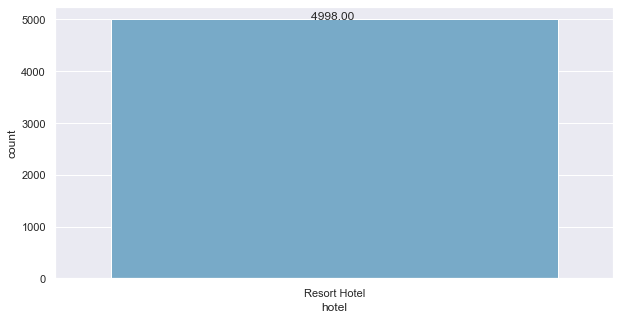

In [105]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["hotel"],palette="Blues") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} '.format(height),
            ha="center"
           ) 
plt.show()

- di dalam dataset 5000 rows jenis hotel hanya hotel Resort

### Adult

### Visualisasi jumlah guest adult

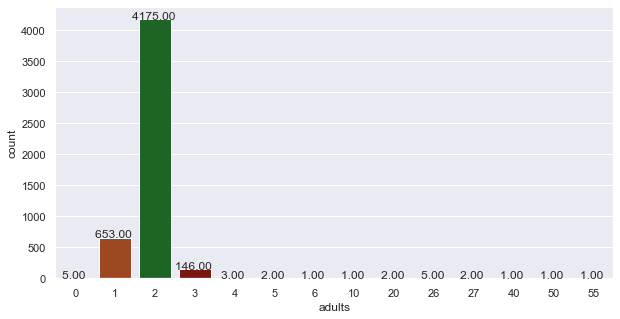

In [122]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["adults"],palette="dark") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} '.format(height),
            ha="center"
           ) 
plt.show()

total guest adult terbanyak yang booking kebanyakan berjumlah dua orang

### Total guest canceled berdasarkan guest adult

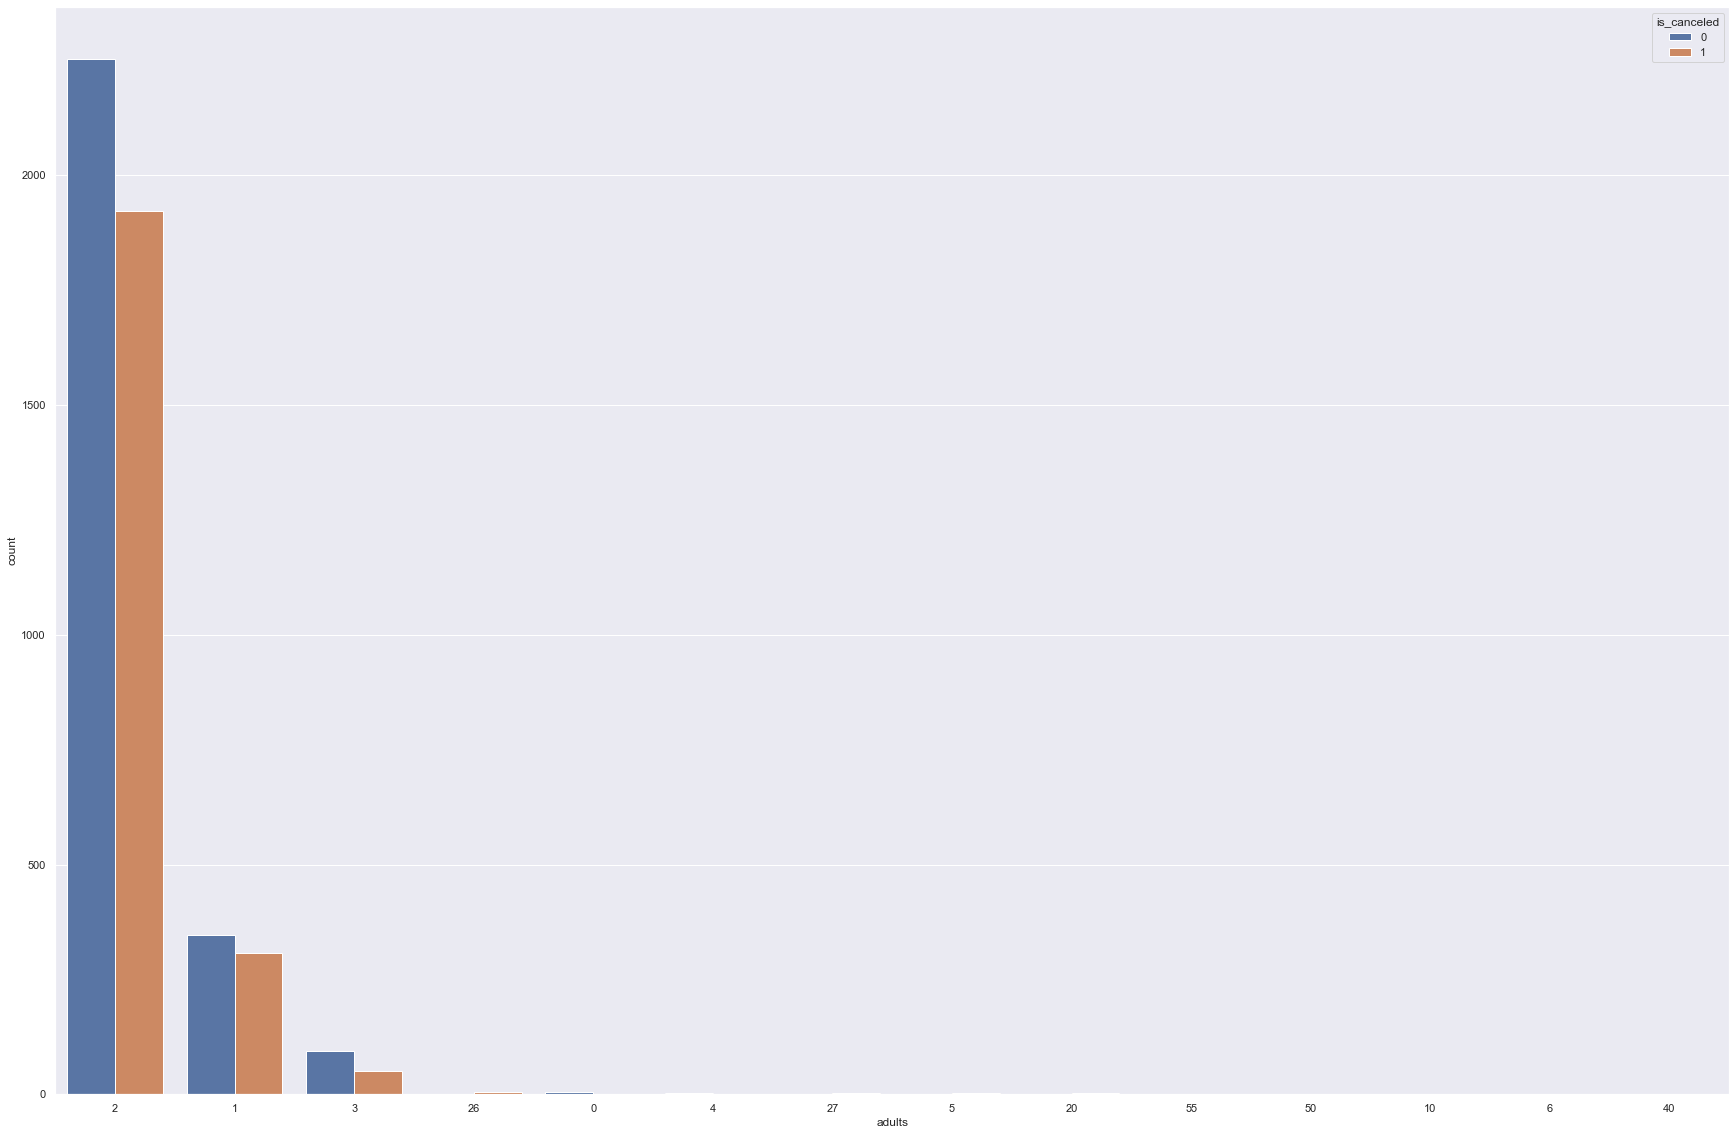

In [107]:
plt.figure(figsize=(30,20))
sns.set(style='darkgrid')


sns.countplot(x = 'adults',
              data = df,hue=df["is_canceled"],
              order = df['adults'].value_counts().index)
plt.show()

### Visualisasi jumlah guest yang membawa babies

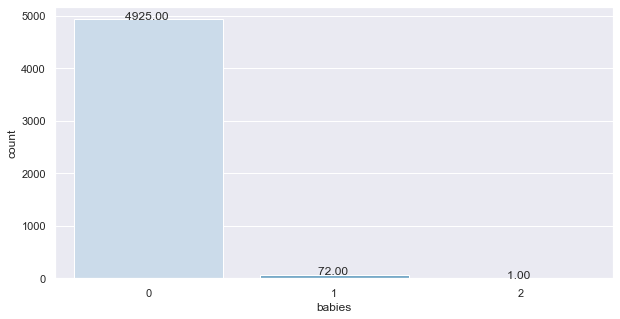

In [108]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["babies"],palette="Blues") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} '.format(height),
            ha="center"
           ) 
plt.show()

### Total guest canceled berdasarkan guest yang membawa babies

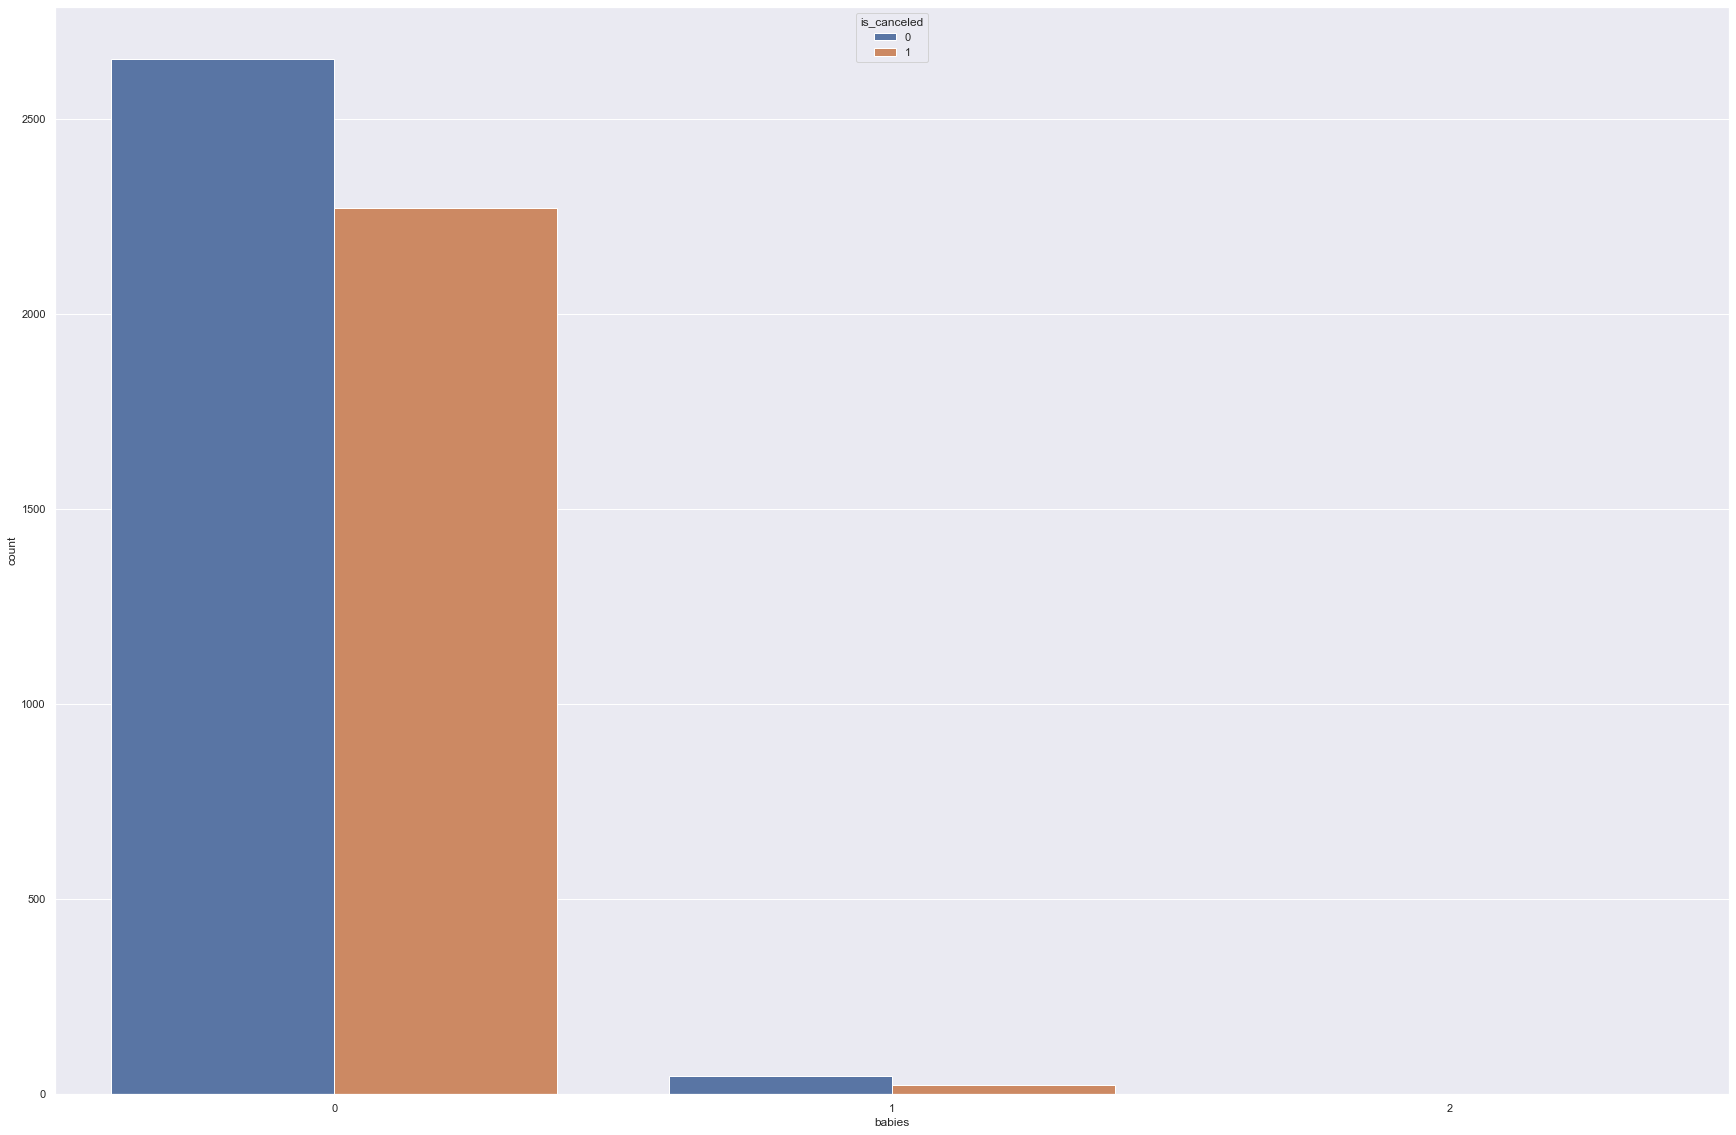

In [109]:
plt.figure(figsize=(30,20))
sns.set(style='darkgrid')


sns.countplot(x = 'babies',
              data = df,hue=df["is_canceled"],
              order = df['babies'].value_counts().index)
plt.show()

### Total guest yang juga akan membawa children

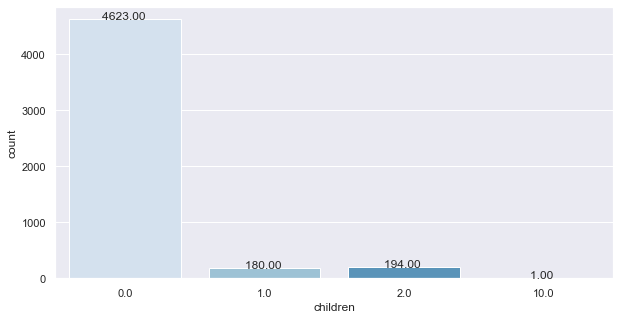

In [110]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["children"],palette="Blues") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} '.format(height),
            ha="center"
           ) 
plt.show()

### Total guest canceled berdasarkan guest yang membawa children

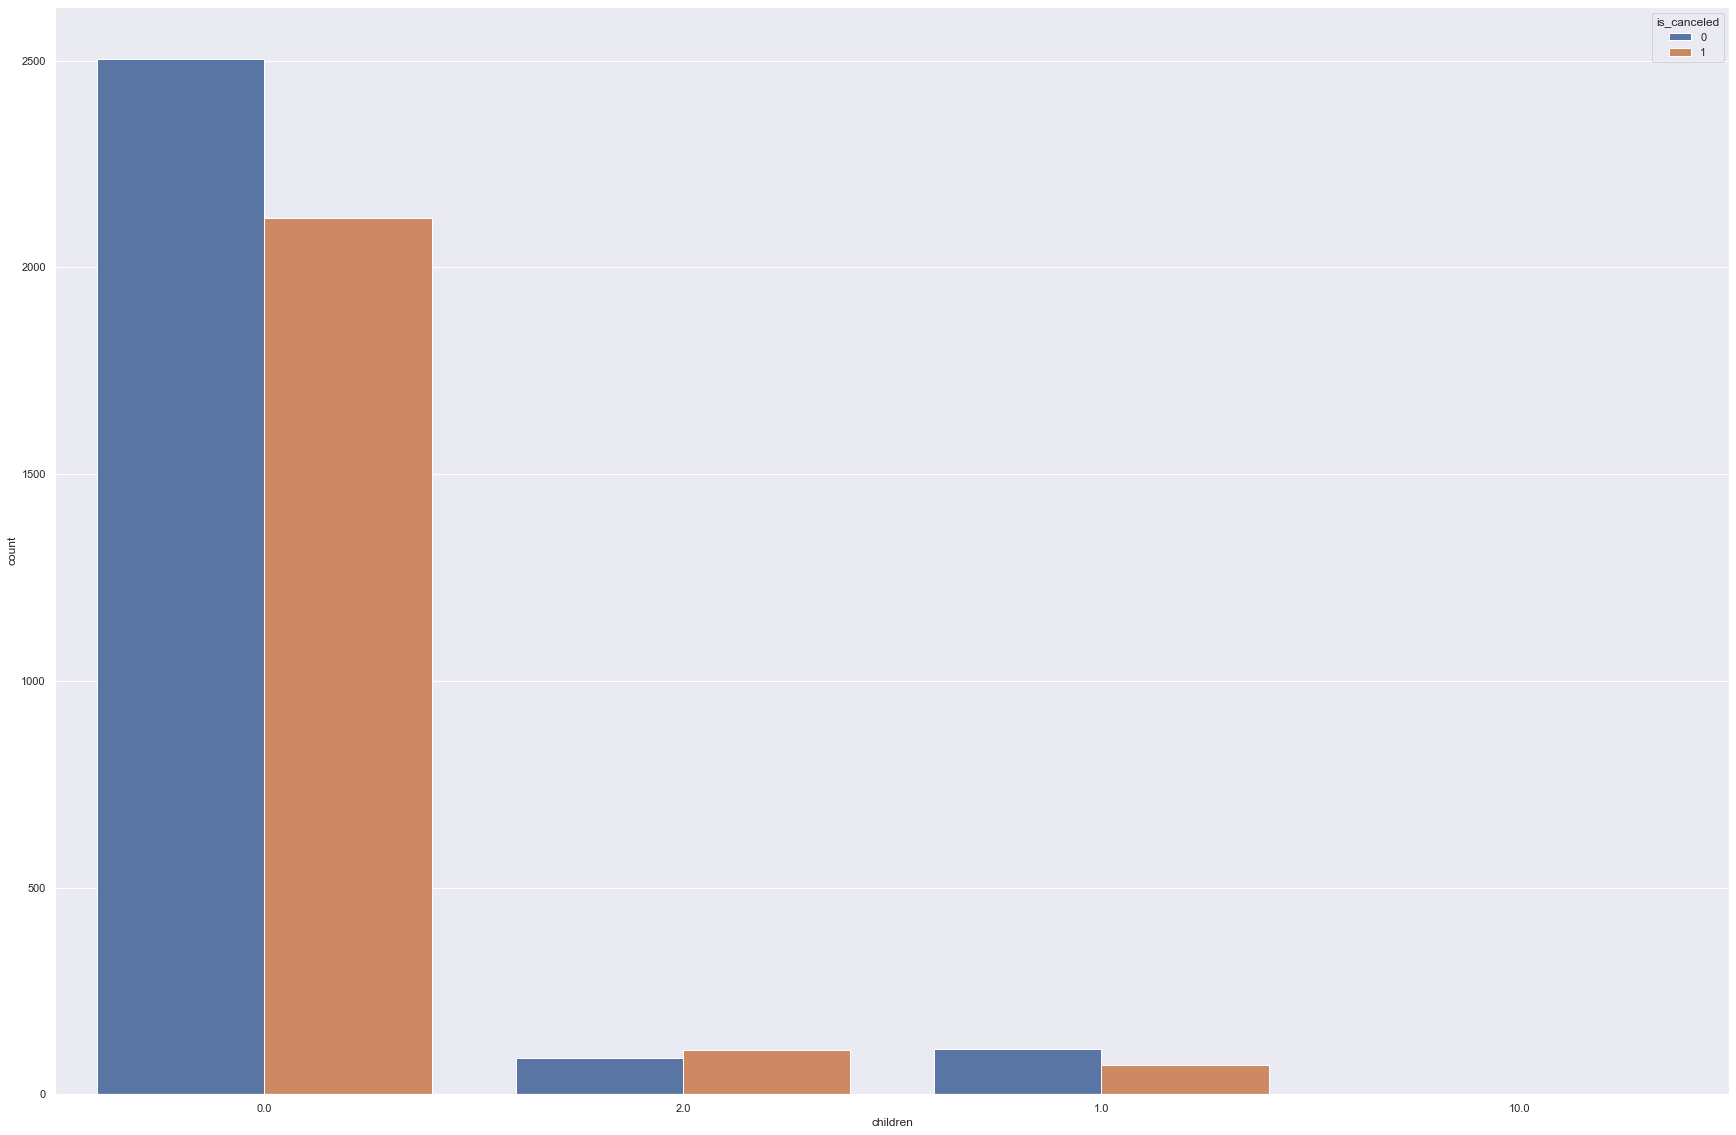

In [111]:
plt.figure(figsize=(30,20))
sns.set(style='darkgrid')


sns.countplot(x = 'children',
              data = df,hue=df["is_canceled"],
              order = df['children'].value_counts().index)
plt.show()

### Visualisasi total keseluruhan guest 

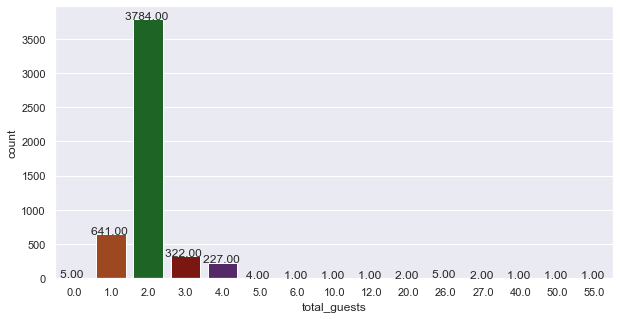

In [112]:
df['total_guests']=df['adults']+df['children']+df['babies']
plt.figure(figsize=(10,5))
ax = sns.countplot(df["total_guests"],palette="dark") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} '.format(height),
            ha="center"
           ) 
plt.show()

- kebanyakan guest yang memesan berjumlah dua orang

## is canceled berdasarkan jumlah guest

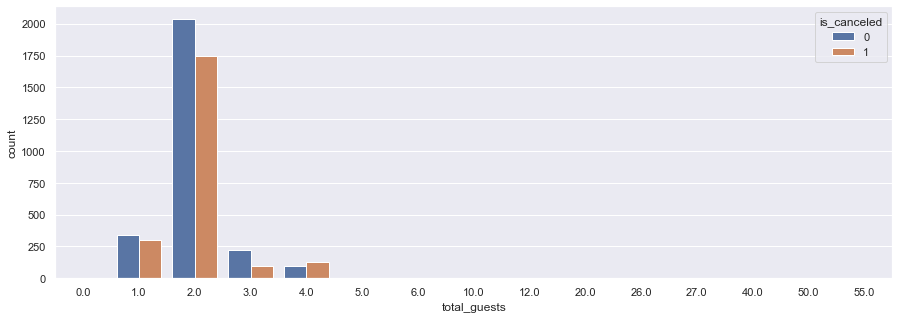

In [113]:
plt.figure(figsize=(15,5))
sns.countplot(x='total_guests',data=df,hue='is_canceled')

- Jumlah guest paling banyak canceled guest yng datang dua orang

## Visualisi Jumlah Guest berdasarkan Negara

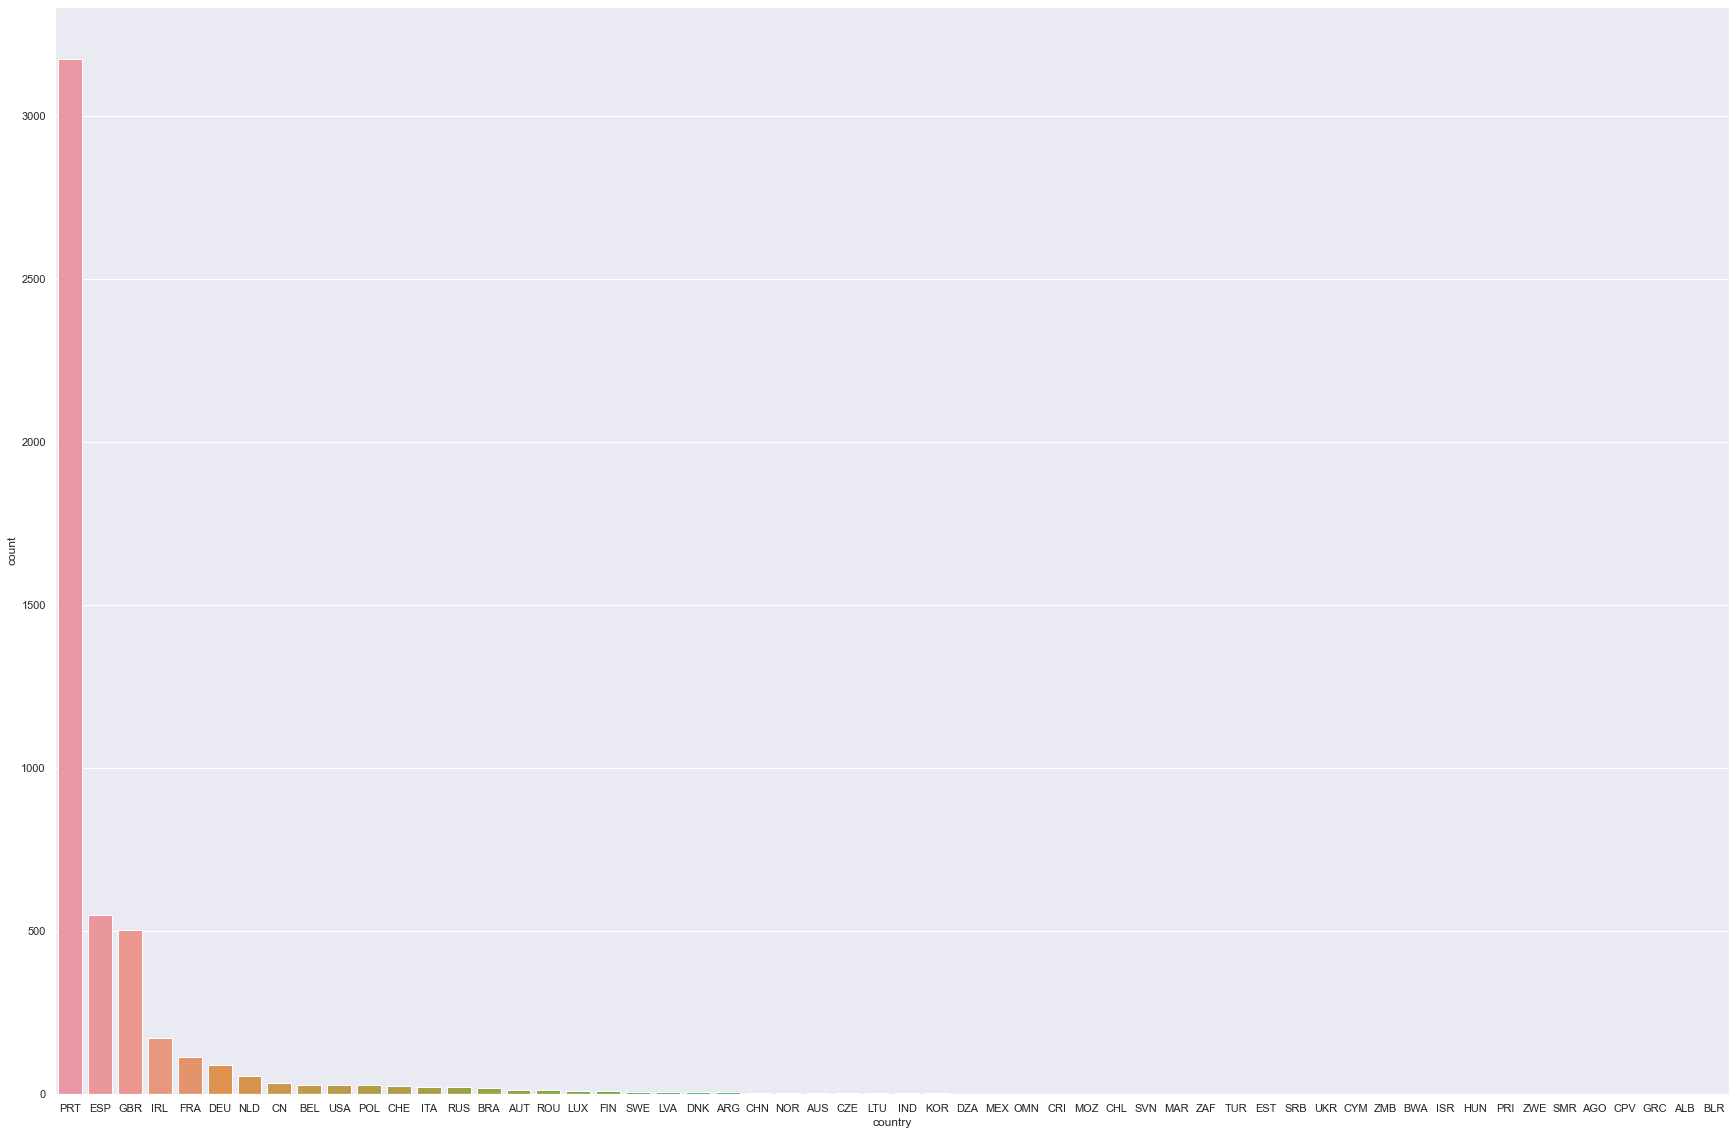

In [114]:
plt.figure(figsize=(30,20))
sns.set(style='darkgrid')


sns.countplot(x = 'country',
              data = df,
              order = df['country'].value_counts().index)
plt.show()

- Paling Banyak Guest dari negara dengan code PRT

## Is canceled berdasarkan Guest Asal Negara

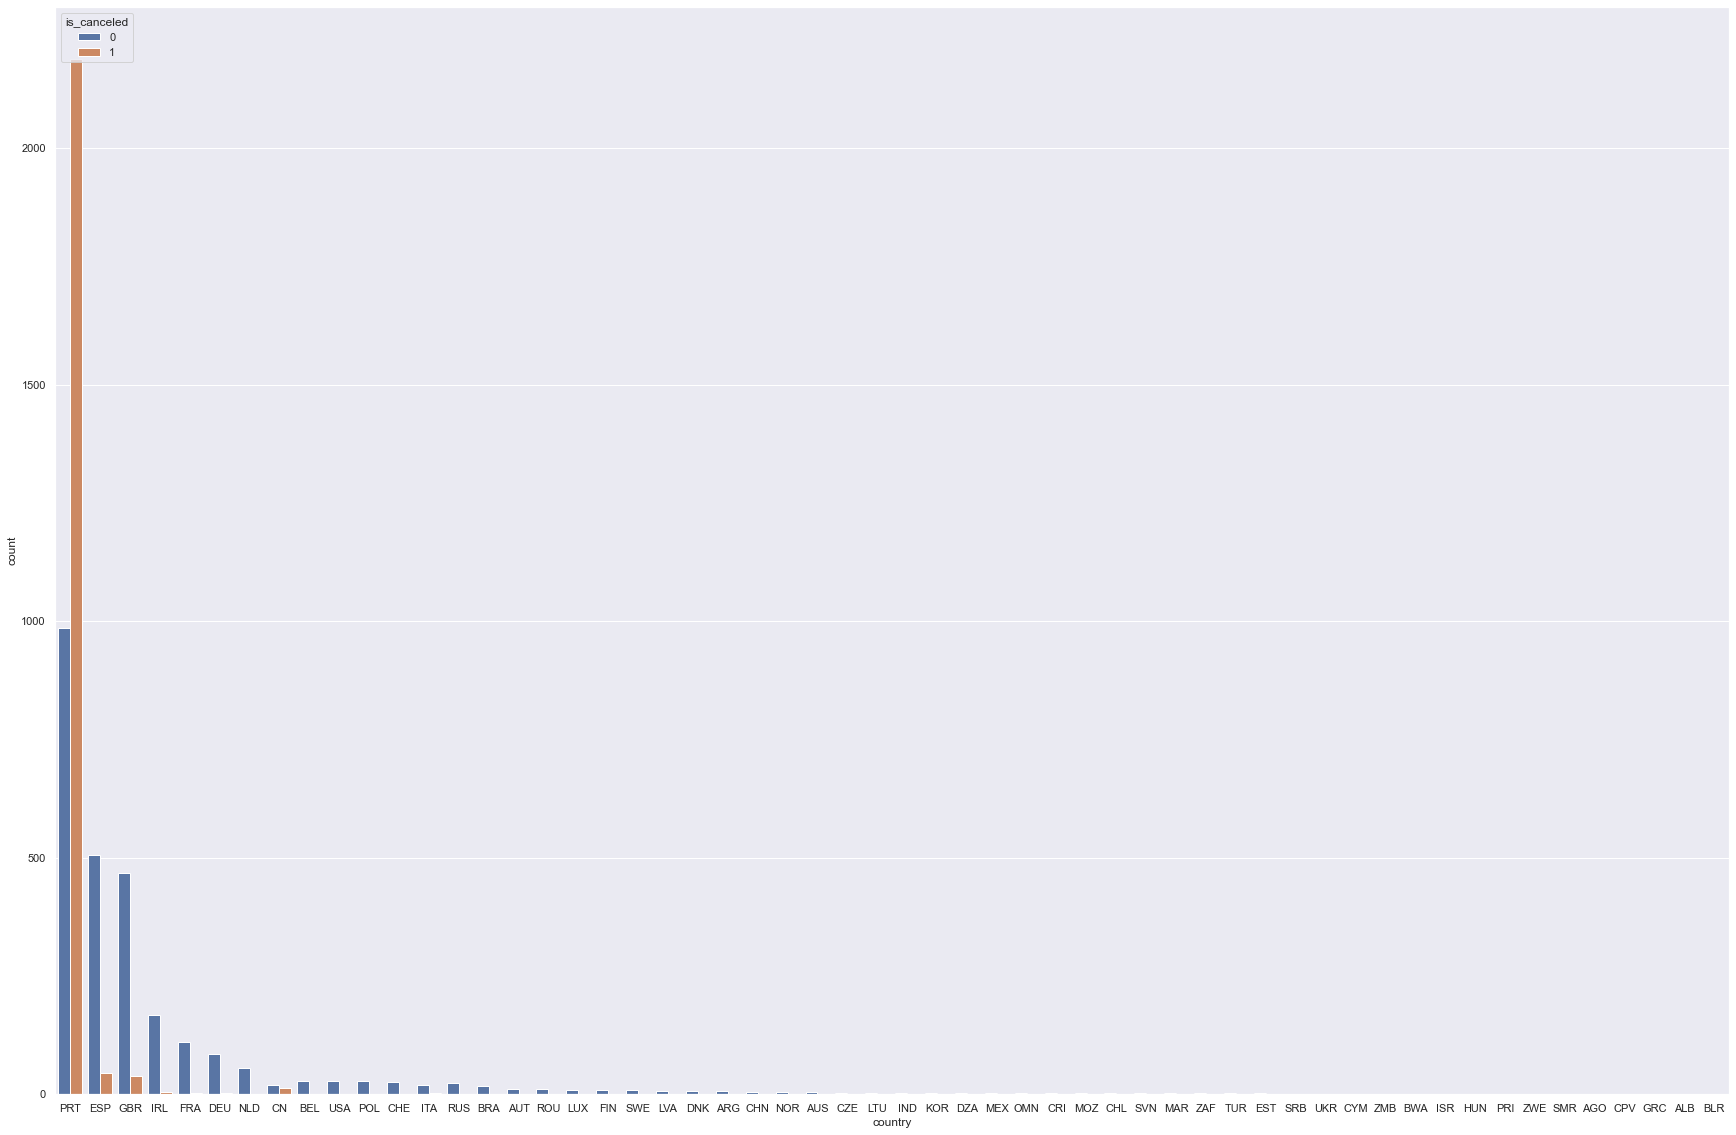

In [115]:
plt.figure(figsize=(30,20))
sns.set(style='darkgrid')


sns.countplot(x = 'country',
              data = df,hue= df['is_canceled'],
              order = df['country'].value_counts().index)
plt.show()

- Paling banyak canceled dari negara dengan code PRT 

## Visualisasi jumlah guest yang juga memesan Meal atau tidak

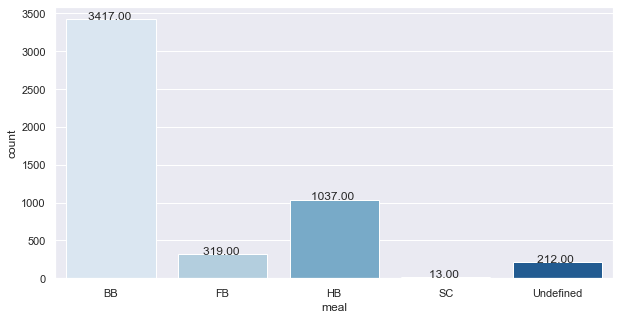

In [116]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["meal"],palette="Blues") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} '.format(height),
            ha="center"
           ) 
plt.show()

## Is canceled berdasarkan guest yang juga memesan meal atau tidak

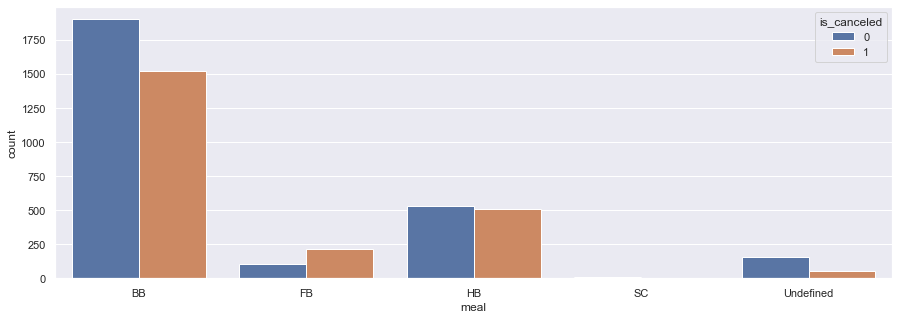

In [117]:
plt.figure(figsize=(15,5))
sns.countplot(x='meal',data=df,hue='is_canceled')

- Paling banyak guest memesan Bed and Breakfast juga dengan yang paling banyak canceled juga BB

## Visualisasi jumlah market_segment guest

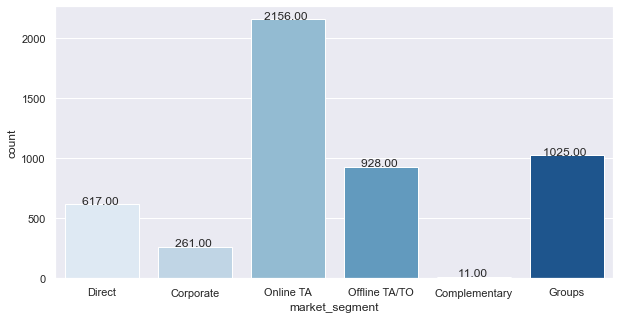

In [118]:
plt.figure(figsize=(10,5))
ax = sns.countplot(df["market_segment"],palette="Blues") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} '.format(height),
            ha="center"
           ) 
plt.show()

- Segment Guest terbanyak  dari online Travel agent paling rendah complementary

### In canceled berdasarkan dari market segment

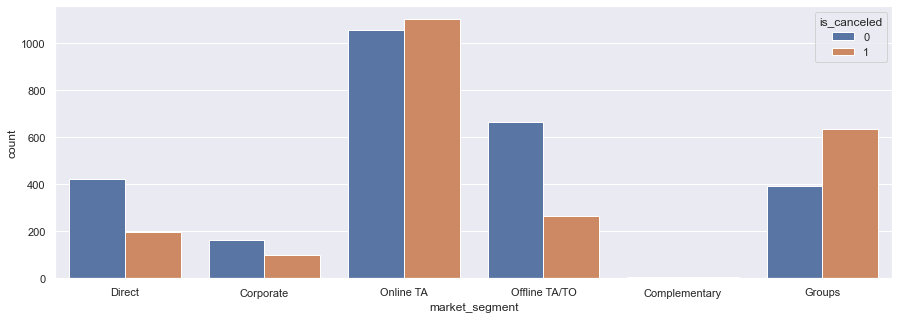

In [119]:
plt.figure(figsize=(15,5))
sns.countplot(x='market_segment',data=df,hue='is_canceled')

- Online TA juga terbanyak dalam in canceled

### Visualisasi jumlah distribution_channel

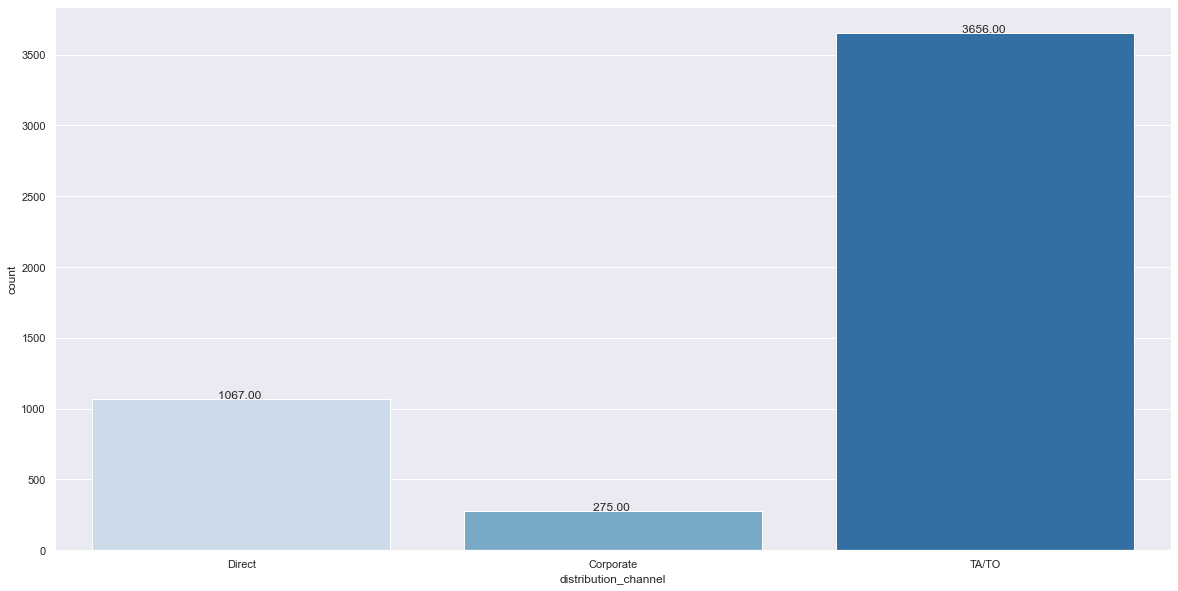

In [125]:
plt.figure(figsize=(20,10))
ax = sns.countplot(df["distribution_channel"],palette="Blues") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} '.format(height),
            ha="center"
           ) 
plt.show()

### In canceled berdasarkan distribution_channel

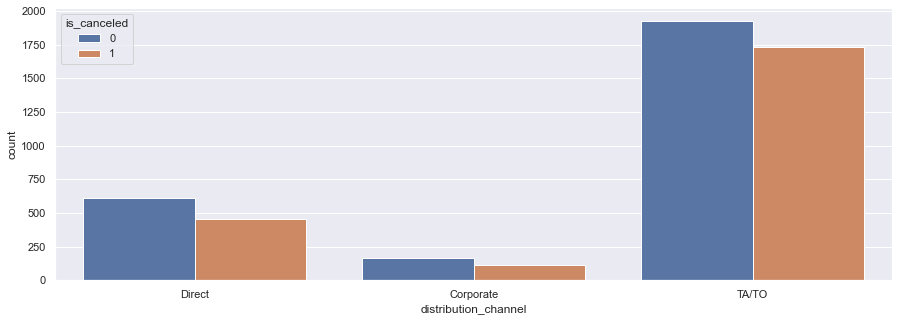

In [126]:
plt.figure(figsize=(15,5))
sns.countplot(x='distribution_channel',data=df,hue='is_canceled')

- Terbanyak Guest membooking dari TA/TO juga dengan yang paling banyak canceled

### Visualisasi Jumlah reserved_room_type

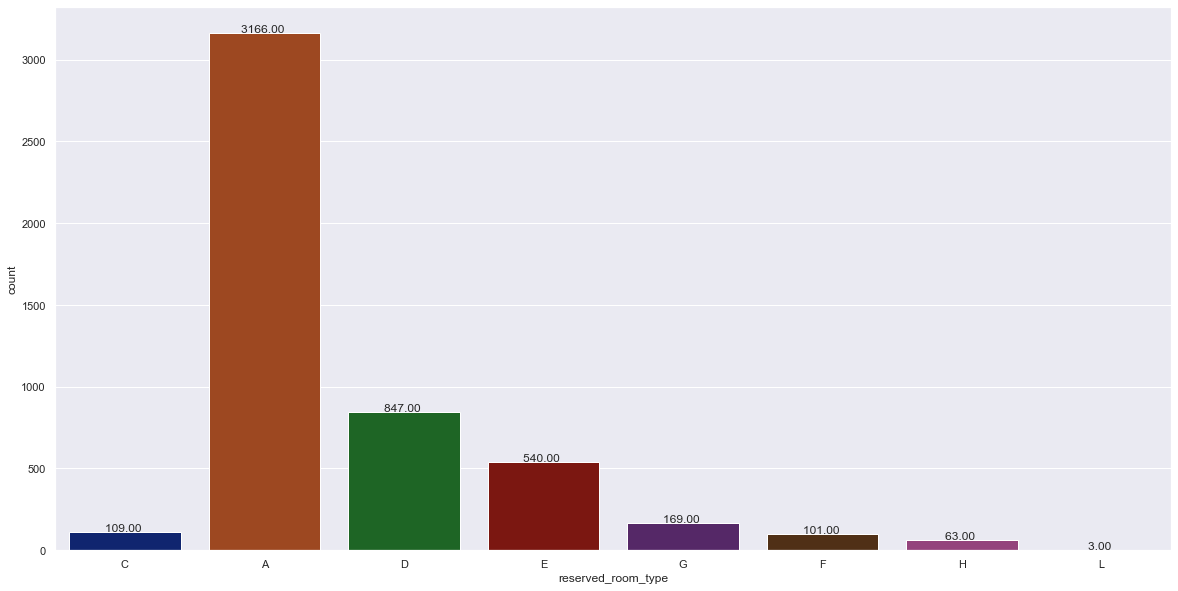

In [129]:
plt.figure(figsize=(20,10))
ax = sns.countplot(df["reserved_room_type"],palette="dark") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} '.format(height),
            ha="center"
           ) 
plt.show()

## Incanceled berdasarkan Reserved Room Type

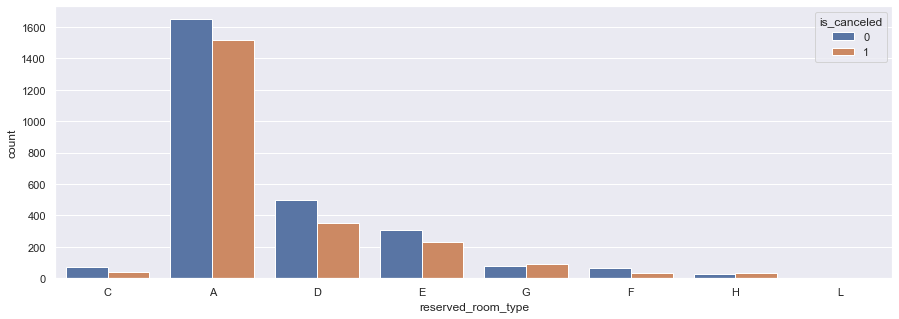

In [131]:
plt.figure(figsize=(15,5))
sns.countplot(x='reserved_room_type',data=df,hue='is_canceled')

- Paling banyak guest memesan room type code A dan terendah code L dan jumlah yang sama dengan yang terbanyak dan terendah dalam canceled

## Visualisasi booking_changes distribution

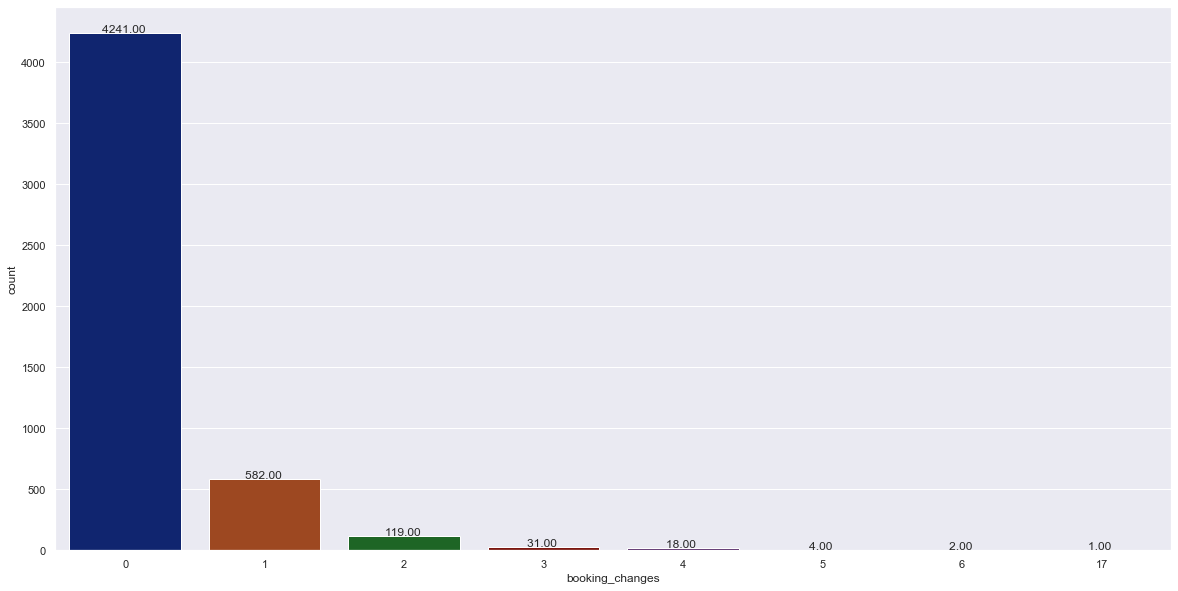

In [133]:
plt.figure(figsize=(20,10))
ax = sns.countplot(df["booking_changes"],palette="dark") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} '.format(height),
            ha="center"
           ) 
plt.show()

## Incanceled berdasarkan booking changes

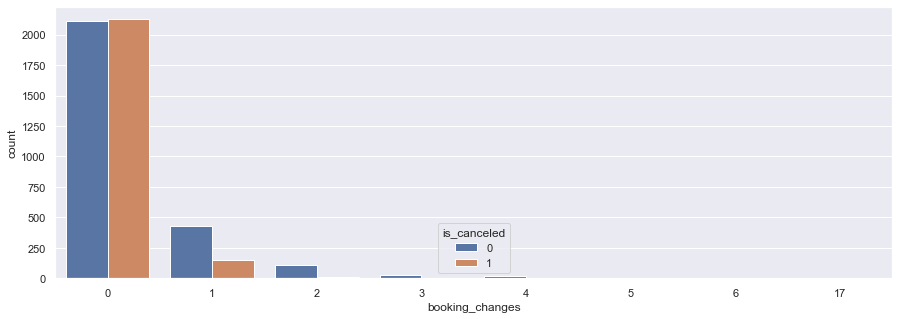

In [134]:
plt.figure(figsize=(15,5))
sns.countplot(x='booking_changes',data=df,hue='is_canceled')

- guest hampir semua tidak melakukan perubahan booking changes

## Visualisasi deposit_type Distribution

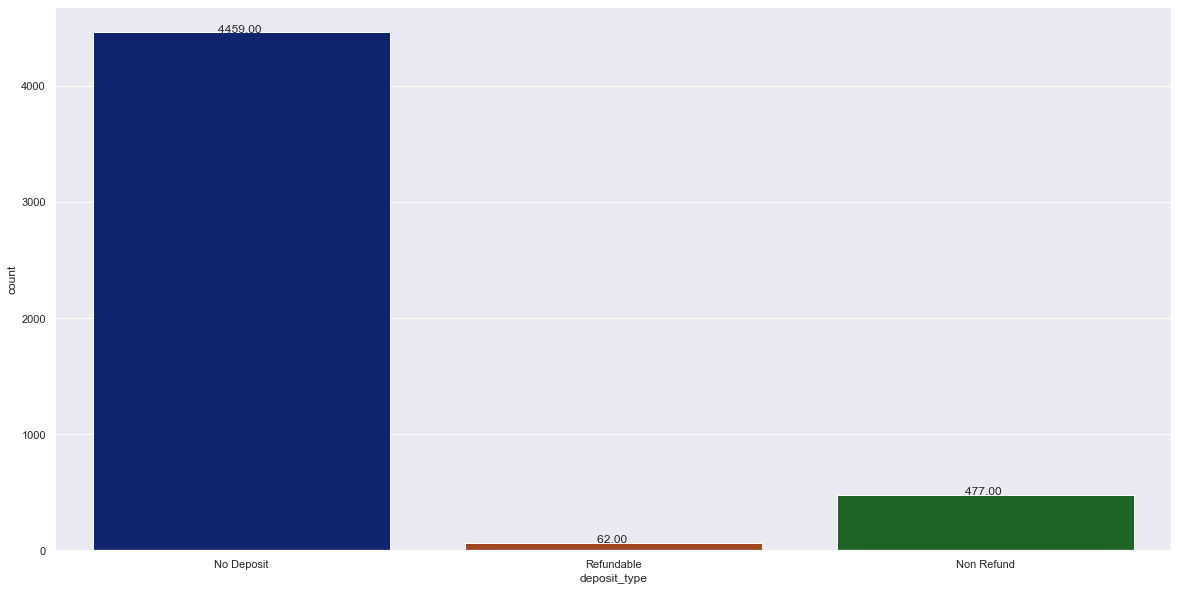

In [135]:
plt.figure(figsize=(20,10))
ax = sns.countplot(df["deposit_type"],palette="dark") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} '.format(height),
            ha="center"
           ) 
plt.show()

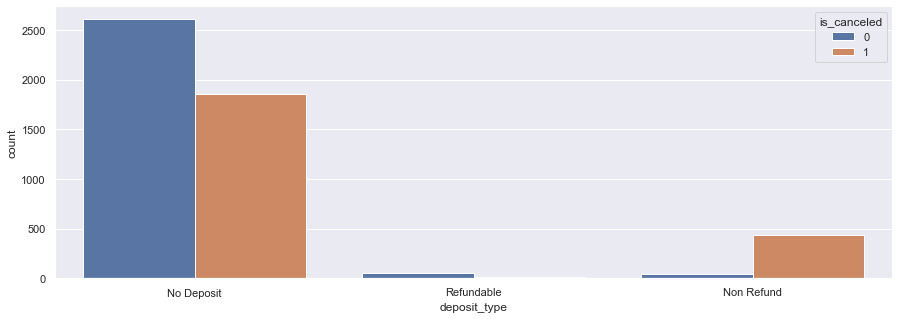

In [136]:
plt.figure(figsize=(15,5))
sns.countplot(x='deposit_type',data=df,hue='is_canceled')

- hampir semua guest yang booking tidak melakukan deposit disanalah mungkin masalah terbesarr penyebab banyaknya guest yang melakukan canceled

In [137]:
df

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_guests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0,2.0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0,2.0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0,1.0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0,1.0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0,2.0
4996,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0,2.0
4997,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0,2.0
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0,2.0


## Visualisasi days_in_waiting_list Distribution

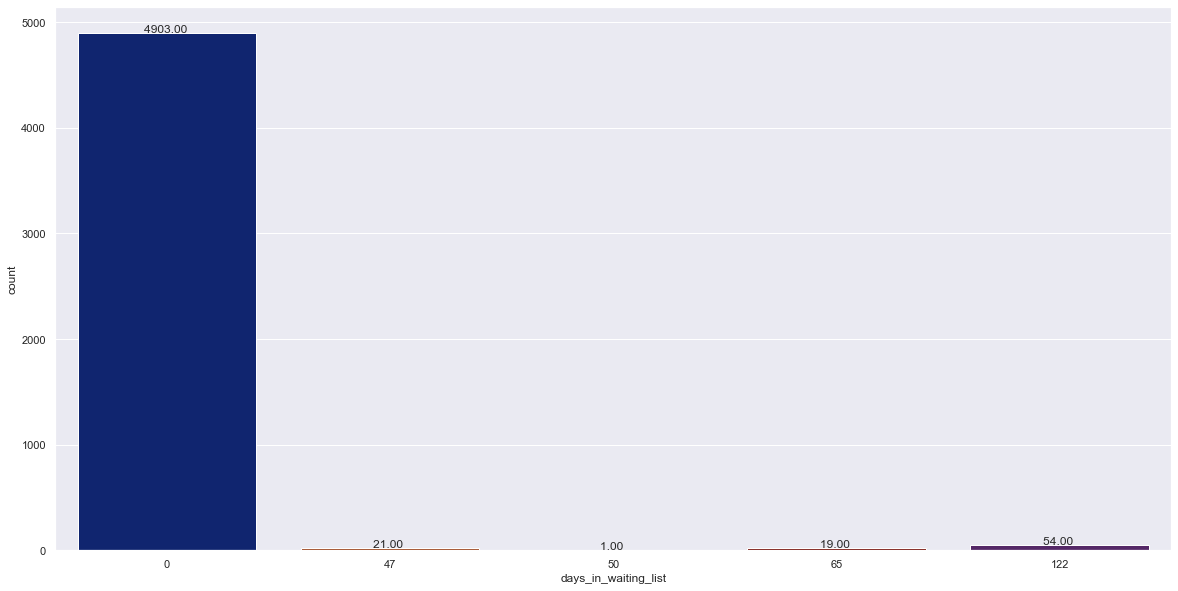

In [139]:
plt.figure(figsize=(20,10))
ax = sns.countplot(df["days_in_waiting_list"],palette="dark") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} '.format(height),
            ha="center"
           ) 
plt.show()

- Hampir semua guest yang booking tidak pernah dalam waiting list

## Visualisasi customer_type Distribution


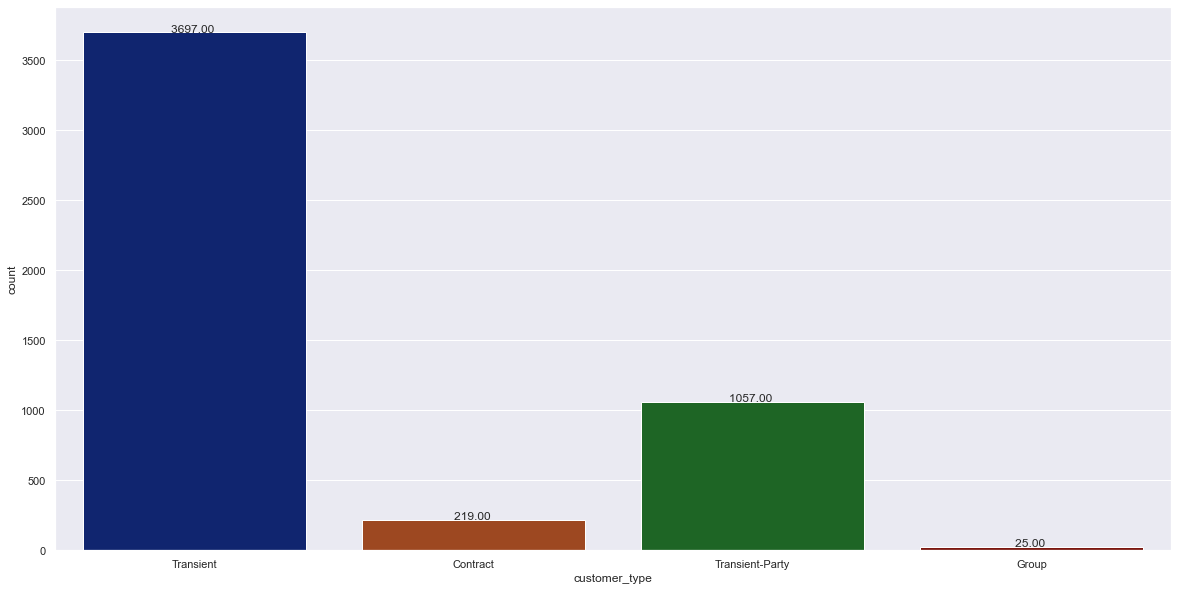

In [140]:
plt.figure(figsize=(20,10))
ax = sns.countplot(df["customer_type"],palette="dark") 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f} '.format(height),
            ha="center"
           ) 
plt.show()

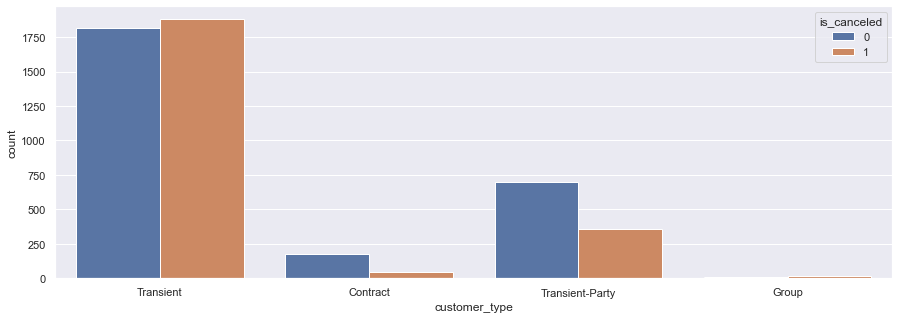

In [141]:
plt.figure(figsize=(15,5))
sns.countplot(x='customer_type',data=df,hue='is_canceled')

- Terbesar guest dengan customer type  Transient juga dalam hal canceled

# ENCODE FEATURE

In [142]:
def unik(columnname):
    print(columnname,":" ,df[columnname].unique())
for i in range(1,len(df.columns)):
    unik(df.columns[i])

is_canceled : [0 1]
adults : [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children : [ 0.  1.  2. 10.]
babies : [0 1 2]
meal : ['BB' 'FB' 'HB' 'SC' 'Undefined']
country : ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN']
market_segment : ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups']
distribution_channel : ['Direct' 'Corporate' 'TA/TO']
reserved_room_type : ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L']
booking_changes : [ 3  4  0  1  2  5 17  6]
deposit_type : ['No Deposit' 'Refundable' 'Non Refund']
days_in_waiting_list : [  0  50  47  65 122]
customer_type : ['Transient' 'Contract' 'Transient-Party' 'Group']
required_car_parking_spaces : [0 1 2]
total_of_special_requests : [0 1 3 2 

In [181]:
df2 = df.copy()

In [183]:
le = LabelEncoder()
le_count = 0
for col in df2.columns[0:]:
    if df2[col].dtype == 'object':
        if len(list(df2[col].unique())) <= 10:
            le.fit(df2[col])
            df2[col] = le.transform(df2[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

0 columns were label encoded.


In [184]:
df2["country"] = LabelEncoder().fit_transform(df["country"])

In [185]:
df2

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_guests
0,0,0,2,0.0,0,0,43,2,1,1,3,0,0,2,0,0,2.0
1,0,0,2,0.0,0,0,43,2,1,1,4,0,0,2,0,0,2.0
2,0,0,1,0.0,0,0,24,2,1,0,0,0,0,2,0,0,1.0
3,0,0,1,0.0,0,0,24,1,0,0,0,0,0,2,0,0,1.0
4,0,0,2,0.0,0,0,24,5,2,0,0,0,0,2,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,2,0.0,0,2,43,3,1,2,0,1,0,2,0,0,2.0
4996,0,1,2,0.0,0,2,43,3,1,2,0,1,0,2,0,0,2.0
4997,0,1,2,0.0,0,2,43,3,1,0,0,1,0,2,0,0,2.0
4998,0,1,2,0.0,0,2,43,3,1,0,0,1,0,2,0,0,2.0


In [190]:
def unik(columnname):
    print(columnname,":" ,df2[columnname].unique())
for i in range(1,len(df.columns)):
    unik(df.columns[i])

is_canceled : [0 1]
adults : [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children : [ 0.  1.  2. 10.]
babies : [0 1 2]
meal : [0 1 2 3 4]
country : [43 24 52 20 28 23 44 39 40  2 41 17  5  9 12 25 30 38 18 45 49  3 21 16
  7 22 37  8 33 48  1 27 11 36 35 51 46 34 42 47 10  4  6 32 50 53  0 29
 15 54 13 55 19 31 14 26]
market_segment : [2 1 5 4 0 3]
distribution_channel : [1 0 2]
reserved_room_type : [1 0 2 3 5 4 6 7]
booking_changes : [ 3  4  0  1  2  5 17  6]
deposit_type : [0 2 1]
days_in_waiting_list : [  0  50  47  65 122]
customer_type : [2 0 3 1]
required_car_parking_spaces : [0 1 2]
total_of_special_requests : [0 1 3 2 4]
total_guests : [ 2.  1.  3.  4.  5. 12. 40. 26. 50. 27. 55.  0. 20.  6. 10.]


In [187]:
df2

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_guests
0,0,0,2,0.0,0,0,43,2,1,1,3,0,0,2,0,0,2.0
1,0,0,2,0.0,0,0,43,2,1,1,4,0,0,2,0,0,2.0
2,0,0,1,0.0,0,0,24,2,1,0,0,0,0,2,0,0,1.0
3,0,0,1,0.0,0,0,24,1,0,0,0,0,0,2,0,0,1.0
4,0,0,2,0.0,0,0,24,5,2,0,0,0,0,2,0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,2,0.0,0,2,43,3,1,2,0,1,0,2,0,0,2.0
4996,0,1,2,0.0,0,2,43,3,1,2,0,1,0,2,0,0,2.0
4997,0,1,2,0.0,0,2,43,3,1,0,0,1,0,2,0,0,2.0
4998,0,1,2,0.0,0,2,43,3,1,0,0,1,0,2,0,0,2.0


### Correlation feature terhadap is canceled

In [188]:
corr=df2.corr()
corr

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_guests
hotel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,NaN,1.000000,0.045377,0.024692,-0.029545,-0.019874,0.525339,0.058833,0.047006,-0.026650,-0.181189,0.197513,-0.113445,-0.009795,-0.295372,-0.082645,0.047919
adults,NaN,0.045377,1.000000,0.009222,0.001243,0.013980,0.026271,-0.004093,0.025198,0.031809,-0.023041,-0.014212,-0.017697,-0.111721,-0.000485,-0.008060,0.959417
children,NaN,0.024692,0.009222,1.000000,0.001624,-0.075131,0.058396,0.049605,0.017253,0.395056,0.065713,-0.082765,-0.034017,-0.063449,0.051829,0.035593,0.280729
babies,NaN,-0.029545,0.001243,0.001624,1.000000,0.005203,0.047645,0.011328,0.005532,0.007465,0.060594,-0.040243,-0.015827,-0.004773,0.033784,0.175667,0.076421
meal,NaN,-0.019874,0.013980,-0.075131,0.005203,1.000000,-0.077299,-0.136051,0.098635,-0.131901,0.034655,0.111090,0.342231,0.245583,-0.073256,-0.184230,-0.006654
country,NaN,0.525339,0.026271,0.058396,0.047645,-0.077299,1.000000,-0.026473,-0.074903,-0.000362,-0.081799,0.029757,0.019993,-0.017418,-0.128511,0.005160,0.044571
market_segment,NaN,0.058833,-0.004093,0.049605,0.011328,-0.136051,-0.026473,1.000000,0.820079,0.123353,-0.135290,-0.189111,-0.070932,-0.219112,0.029293,0.369037,0.010413
distribution_channel,NaN,0.047006,0.025198,0.017253,0.005532,0.098635,-0.074903,0.820079,1.000000,0.048969,-0.175271,-0.127005,0.045828,-0.179300,-0.007460,0.230244,0.029212
reserved_room_type,NaN,-0.026650,0.031809,0.395056,0.007465,-0.131901,-0.000362,0.123353,0.048969,1.000000,-0.007576,-0.189980,-0.087651,-0.162213,0.114584,0.087796,0.138363


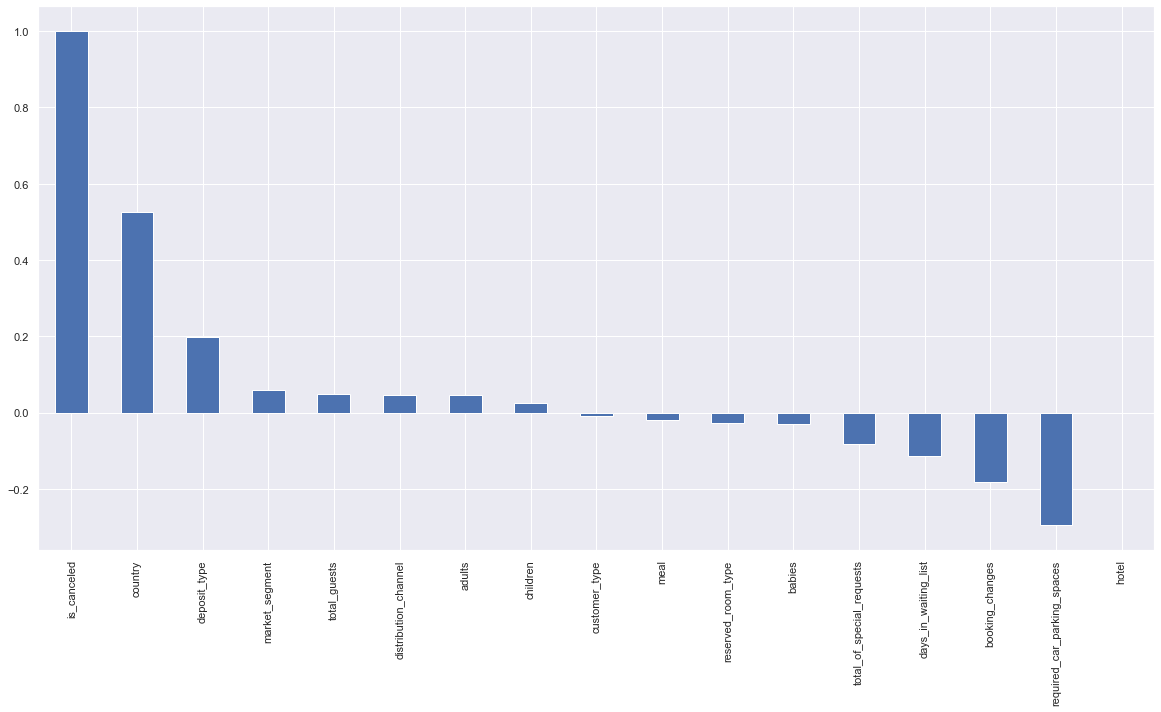

In [189]:
plt.figure(figsize=(20,10))
df2.corr()['is_canceled'].sort_values(ascending = False).plot(kind='bar')
plt.show()

- feature yang mempunyai correlation positif : country,deposit_type, market_segment, total_guest, distribution_channel,adults,babies,children,customer_type

# MACHINE LEARNING

## Logistic Regression

#### Train 90 Test 10 Tanpa intervensi data semua feature

In [191]:
df_LR = df2.copy()

In [192]:
x_LR = df_LR.drop(["is_canceled"],axis=1)
y_LR = df_LR["is_canceled"]

In [193]:
xLR_train, xLR_test, yLR_train, yLR_test = train_test_split(x_LR, y_LR, test_size = 0.1, random_state = 0)

In [194]:

modelLR = LogisticRegression()

modelLR.fit(xLR_train,yLR_train)

LogisticRegression()

In [195]:
y_predLR = modelLR.predict(xLR_test)

In [196]:
confusion_matrix(yLR_test,y_predLR)

array([[196,  73],
       [ 24, 207]])

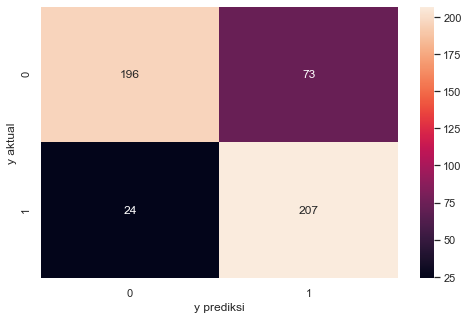

In [197]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLR_test,y_predLR),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [198]:
print(classification_report(yLR_test,y_predLR))

precision    recall  f1-score   support

           0       0.89      0.73      0.80       269
           1       0.74      0.90      0.81       231

    accuracy                           0.81       500
   macro avg       0.82      0.81      0.81       500
weighted avg       0.82      0.81      0.81       500



In [199]:
pd.DataFrame(data= [accuracy_score(yLR_test,y_predLR)*100,recall_score(yLR_test,y_predLR)*100,precision_score(yLR_test,y_predLR)*100,roc_auc_score(yLR_test,y_predLR)*100,f1_score(yLR_test,y_predLR)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,80.600000
recall,89.610390
precission,73.928571
roc_auc_score,81.236422
F1 Score,81.017613


In [200]:
pd.DataFrame(data= [modelLR.score(xLR_train,yLR_train)*100,modelLR.score(xLR_test,yLR_test)*100],
             index=["Model Score in Data Train","Model Score in data Test"],
             columns=["Score %"]

)

,Score %
Model Score in Data Train,80.635838
Model Score in data Test,80.600000


#### Train 80 Test 20 Tanpa intervensi data semua feature

In [202]:
x_LR1 = df_LR.drop(["is_canceled"],axis=1)
y_LR1 = df_LR["is_canceled"]
xLR1_train, xLR1_test, yLR1_train, yLR1_test = train_test_split(x_LR1, y_LR1, test_size = 0.2, random_state = 0)
modelLR1 = LogisticRegression()
modelLR1.fit(xLR1_train,yLR1_train)
y_predLR1 = modelLR1.predict(xLR1_test)



precision    recall  f1-score   support

           0       0.91      0.74      0.82       549
           1       0.74      0.91      0.82       451

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.83      0.82      0.82      1000



In [204]:
confusion_matrix(yLR1_test,y_predLR1)

array([[407, 142],
       [ 42, 409]])

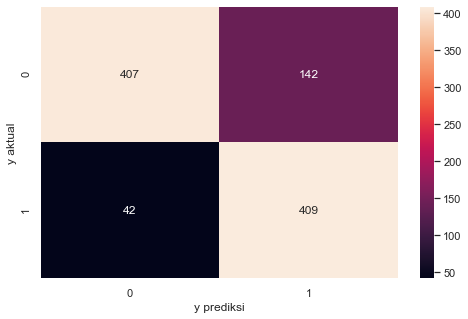

In [205]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLR1_test,y_predLR1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [203]:
print(classification_report(yLR1_test,y_predLR1))

precision    recall  f1-score   support

           0       0.91      0.74      0.82       549
           1       0.74      0.91      0.82       451

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.83      0.82      0.82      1000



In [206]:
pd.DataFrame(data= [accuracy_score(yLR1_test,y_predLR1)*100,recall_score(yLR1_test,y_predLR1)*100,precision_score(yLR1_test,y_predLR1)*100,roc_auc_score(yLR1_test,y_predLR1)*100,f1_score(yLR1_test,y_predLR1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,81.600000
recall,90.687361
precission,74.228675
roc_auc_score,82.411076
F1 Score,81.636727


In [207]:
pd.DataFrame(data= [modelLR1.score(xLR1_train,yLR1_train)*100,modelLR1.score(xLR1_test,yLR1_test)*100],
             index=["Model Score in Data Train","Model Score in data Test"],
             columns=["Score %"]

)

,Score %
Model Score in Data Train,80.690345
Model Score in data Test,81.600000


### Parameter Tuning

In [ ]:
# parameter model linear regression yang akan dituned + value di setiap parameter
# penalty = ['l1', 'l2', 'elasticnet', 'none']
# solver = ['newton-cg', 'lbfgs', 'liblinier', 'sag', 'saga']
# max_iter = [1, 10, 100, 1000, 10000]

# simpan dalam variabel dengan nama 'param'
# param = {'penalty': penalty, 'solver': solver, 'max_iter': max_iter}
# param

In [ ]:
# model_LR_tun = LogisticRegression()
# model_LR_tunRS = RandomizedSearchCV(estimator = model_LR_tun, param_distributions = param, cv = 5)

In [ ]:
# model_LR_tunRS.fit(xLR_train, yLR_train)
# model_LR_tunRS.best_params_

### Random Search train 90 test 10 semua feature tanpa scalling

In [208]:
model_LogReg_RS = LogisticRegression(solver='newton-cg', penalty = 'none', max_iter = 10000)
model_LogReg_RS.fit(xLR_train, yLR_train)

LogisticRegression(max_iter=10000, penalty='none', solver='newton-cg')

In [214]:
y_predLR_RS = model_LogReg_RS.predict(xLR_test)

In [215]:
print(classification_report(yLR_test,y_predLR_RS))

precision    recall  f1-score   support

           0       0.88      0.74      0.81       269
           1       0.75      0.89      0.81       231

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.82      0.81      0.81       500



In [220]:


pd.DataFrame(data = [accuracy_score(yLR_test, y_pred_LR_RS)*100, recall_score(yLR_test, y_pred_LR_RS)*100,
                    precision_score(yLR_test, y_pred_LR_RS)*100, roc_auc_score(yLR_test, y_pred_LR_RS)*100,
                    f1_score(yLR_test, y_pred_LR_RS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,80.800000
recall,88.744589
precision,74.545455
roc_auc_score,81.361142
f1_score,81.027668


In [217]:
pd.DataFrame(data= [model_LogReg_RS.score(xLR_train,yLR_train)*100,modelLR.score(xLR_test,yLR_test)*100],
             index=["Model Score in Data Train","Model Score in data Test"],
             columns=["Score %"]

)

,Score %
Model Score in Data Train,80.724767
Model Score in data Test,80.600000


### Random Search train 80 test 20 semua feature tanpa scalling

In [224]:
y_predLR_RS1 = model_LogReg_RS.predict(xLR1_test)

In [225]:
print(classification_report(yLR1_test,y_predLR_RS1))

precision    recall  f1-score   support

           0       0.89      0.75      0.82       549
           1       0.75      0.89      0.81       451

    accuracy                           0.81      1000
   macro avg       0.82      0.82      0.81      1000
weighted avg       0.83      0.81      0.81      1000



In [229]:
pd.DataFrame(data = [accuracy_score(yLR1_test, y_predLR_RS1)*100, recall_score(yLR1_test, y_predLR_RS1)*100,
                    precision_score(yLR1_test, y_predLR_RS1)*100, roc_auc_score(yLR1_test, y_predLR_RS1)*100,
                    f1_score(yLR1_test, y_predLR_RS1)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,81.400000
recall,89.135255
precision,74.582560
roc_auc_score,82.090396
f1_score,81.212121


In [230]:
pd.DataFrame(data= [model_LogReg_RS.score(xLR_train,yLR_train)*100,modelLR.score(xLR_test,yLR_test)*100],
             index=["Model Score in Data Train","Model Score in data Test"],
             columns=["Score %"]

)

,Score %
Model Score in Data Train,80.724767
Model Score in data Test,80.600000


# Grid Search

### Grid Train 90 test 10 semua feature tanpa scalling

In [ ]:
# model_LR2 = LogisticRegression()
# model_LR_GS = GridSearchCV(model_LR2, param_grid= param, cv = 5)

In [ ]:
# model_LR_GS.fit(xLR_train, yLR_train)
# model_LR_GS.best_params_

In [231]:
model_LogReg_GS = LogisticRegression(solver='lbfgs', penalty = 'none', max_iter = 100)
model_LogReg_GS.fit(xLR_train, yLR_train)

LogisticRegression(penalty='none')

In [232]:
y_pred_LR_GS = model_LogReg_GS.predict(xLR_test)

In [233]:
y_pred_LR_GS = model_LogReg_GS.predict(xLR_test)

pd.DataFrame(data = [accuracy_score(yLR_test, y_pred_LR_GS)*100, recall_score(yLR_test, y_pred_LR_GS)*100,
                    precision_score(yLR_test, y_pred_LR_GS)*100, roc_auc_score(yLR_test, y_pred_LR_GS)*100,
                    f1_score(yLR_test, y_pred_LR_GS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,80.200000
recall,88.311688
precision,73.913043
roc_auc_score,80.772945
f1_score,80.473373


In [234]:
pd.DataFrame(data= [model_LogReg_GS.score(xLR_train,yLR_train)*100,model_LogReg_GS.score(xLR_test,yLR_test)*100],
             index=["Model Score in Data Train","Model Score in data Test"],
             columns=["Score %"]

)

,Score %
Model Score in Data Train,80.524678
Model Score in data Test,80.200000


### Grid Train 80 test 20 semua feature tanpa scalling

In [235]:
y_pred_LR_GS1 = model_LogReg_GS.predict(xLR1_test)

In [238]:

pd.DataFrame(data = [accuracy_score(yLR1_test, y_pred_LR_GS1)*100, recall_score(yLR1_test, y_pred_LR_GS1)*100,
                    precision_score(yLR1_test, y_pred_LR_GS1)*100, roc_auc_score(yLR1_test, y_pred_LR_GS1)*100,
                    f1_score(yLR1_test, y_pred_LR_GS1)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,81.300000
recall,89.578714
precision,74.264706
roc_auc_score,82.038902
f1_score,81.206030


In [242]:
pd.DataFrame(data= [model_LogReg_GS.score(xLR1_train,yLR1_train)*100,model_LogReg_GS.score(xLR1_test,yLR1_test)*100],
             index=["Model Score in Data Train","Model Score in data Test"],
             columns=["Score %"]

)

,Score %
Model Score in Data Train,80.290145
Model Score in data Test,81.300000


## Test Model all feature with scalling

In [243]:
df2_Scal = df2.copy()

In [245]:
scaler = MinMaxScaler(feature_range=(0, 5))
Churn_col = list(df2_Scal.columns)
Churn_col.remove("is_canceled")
for col in Churn_col:
    df2_Scal[col] = df2_Scal[col].astype(float)
    df2_Scal[[col]] = scaler.fit_transform(df2_Scal[[col]])
df2_Scal["is_canceled"] = pd.to_numeric(df2_Scal["is_canceled"], downcast='float')
df2_Scal

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_guests
0,0.0,0.0,0.181818,0.0,0.0,0.0,3.909091,2.0,2.5,0.714286,0.882353,0.0,0.0,3.333333,0.0,0.00,0.181818
1,0.0,0.0,0.181818,0.0,0.0,0.0,3.909091,2.0,2.5,0.714286,1.176471,0.0,0.0,3.333333,0.0,0.00,0.181818
2,0.0,0.0,0.090909,0.0,0.0,0.0,2.181818,2.0,2.5,0.000000,0.000000,0.0,0.0,3.333333,0.0,0.00,0.090909
3,0.0,0.0,0.090909,0.0,0.0,0.0,2.181818,1.0,0.0,0.000000,0.000000,0.0,0.0,3.333333,0.0,0.00,0.090909
4,0.0,0.0,0.181818,0.0,0.0,0.0,2.181818,5.0,5.0,0.000000,0.000000,0.0,0.0,3.333333,0.0,1.25,0.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,1.0,0.181818,0.0,0.0,2.5,3.909091,3.0,2.5,1.428571,0.000000,2.5,0.0,3.333333,0.0,0.00,0.181818
4996,0.0,1.0,0.181818,0.0,0.0,2.5,3.909091,3.0,2.5,1.428571,0.000000,2.5,0.0,3.333333,0.0,0.00,0.181818
4997,0.0,1.0,0.181818,0.0,0.0,2.5,3.909091,3.0,2.5,0.000000,0.000000,2.5,0.0,3.333333,0.0,0.00,0.181818
4998,0.0,1.0,0.181818,0.0,0.0,2.5,3.909091,3.0,2.5,0.000000,0.000000,2.5,0.0,3.333333,0.0,0.00,0.181818


In [247]:
x_LR_Scal = df2_Scal.drop(["is_canceled"],axis=1)
y_LR_Scal = df2_Scal["is_canceled"]

In [250]:
xLRScal_train, xLRScal_test, yLRScal_train, yLRScal_test = train_test_split(x_LR_Scal, y_LR_Scal, test_size = 0.1, random_state = 0)
xLRScal1_train, xLRScal1_test, yLRScal1_train, yLRScal1_test = train_test_split(x_LR_Scal, y_LR_Scal, test_size = 0.2, random_state = 0)
modelLRScal = LogisticRegression()
modelLRScal1 = LogisticRegression()
modelLRScalRS = LogisticRegression(solver='newton-cg', penalty = 'none', max_iter = 10000)
modelLRScalGS = LogisticRegression(solver='lbfgs', penalty = 'none', max_iter = 100)

modelLRScal.fit(xLRScal_train,yLRScal_train)
modelLRScal1.fit(xLRScal1_train,yLRScal1_train)
modelLRScalRS.fit(xLRScal1_train,yLRScal1_train)
modelLRScalGS.fit(xLRScal1_train,yLRScal1_train)

LogisticRegression(penalty='none')

### With Scalling Train 90 no param tuning

In [251]:
y_predLRScal = modelLRScal.predict(xLRScal_test)


In [252]:
confusion_matrix(yLRScal_test,y_predLRScal)

array([[201,  68],
       [ 26, 205]])

In [253]:
print(classification_report(yLRScal_test,y_predLRScal))

precision    recall  f1-score   support

         0.0       0.89      0.75      0.81       269
         1.0       0.75      0.89      0.81       231

    accuracy                           0.81       500
   macro avg       0.82      0.82      0.81       500
weighted avg       0.82      0.81      0.81       500



In [254]:
pd.DataFrame(data = [accuracy_score(yLRScal_test, y_predLRScal)*100, recall_score(yLRScal_test, y_predLRScal)*100,
                    precision_score(yLRScal_test, y_predLRScal)*100, roc_auc_score(yLRScal_test, y_predLRScal)*100,
                    f1_score(yLRScal_test, y_predLRScal)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,81.200000
recall,88.744589
precision,75.091575
roc_auc_score,81.732889
f1_score,81.349206


In [255]:
pd.DataFrame(data= [modelLRScal.score(xLRScal_train,yLRScal_train)*100,modelLRScal.score(xLRScal_test,yLRScal_test)*100],
             index=["Model Score in Data Train","Model Score in data Test"],
             columns=["Score %"]

)

,Score %
Model Score in Data Train,81.302801
Model Score in data Test,81.200000


### With Scalling Train 80 no param tuning

In [ ]:
y_predLRScal1 = modelLRScal1.predict(xLRScal1_test)

In [256]:
print(classification_report(yLRScal_test,y_predLRScal))

precision    recall  f1-score   support

         0.0       0.89      0.75      0.81       269
         1.0       0.75      0.89      0.81       231

    accuracy                           0.81       500
   macro avg       0.82      0.82      0.81       500
weighted avg       0.82      0.81      0.81       500



In [257]:
pd.DataFrame(data = [accuracy_score(yLRScal_test, y_predLRScal)*100, recall_score(yLRScal_test, y_predLRScal)*100,
                    precision_score(yLRScal_test, y_predLRScal)*100, roc_auc_score(yLRScal_test, y_predLRScal)*100,
                    f1_score(yLRScal_test, y_predLRScal)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,81.200000
recall,88.744589
precision,75.091575
roc_auc_score,81.732889
f1_score,81.349206


In [258]:
pd.DataFrame(data= [modelLRScal.score(xLRScal_train,yLRScal_train)*100,modelLRScal.score(xLRScal_test,yLRScal_test)*100],
             index=["Model Score in Data Train","Model Score in data Test"],
             columns=["Score %"]

)

,Score %
Model Score in Data Train,81.302801
Model Score in data Test,81.200000


### With Scalling Train 90 with param tuning

In [259]:
y_predLRScalRS = modelLRScalRS.predict(xLRScal_test)


In [260]:
print(classification_report(yLRScal_test,y_predLRScalRS))

precision    recall  f1-score   support

         0.0       0.88      0.74      0.80       269
         1.0       0.74      0.89      0.81       231

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.82      0.81      0.81       500



In [261]:
pd.DataFrame(data = [accuracy_score(yLRScal_test, y_predLRScalRS)*100, recall_score(yLRScal_test, y_predLRScalRS)*100,
                    precision_score(yLRScal_test, y_predLRScalRS)*100, roc_auc_score(yLRScal_test, y_predLRScalRS)*100,
                    f1_score(yLRScal_test, y_predLRScalRS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,80.600000
recall,88.744589
precision,74.275362
roc_auc_score,81.175268
f1_score,80.867850


In [262]:
pd.DataFrame(data= [modelLRScalRS.score(xLRScal_train,yLRScal_train)*100,modelLRScalRS.score(xLRScal_test,yLRScal_test)*100],
             index=["Model Score in Data Train","Model Score in data Test"],
             columns=["Score %"]

)

,Score %
Model Score in Data Train,80.791463
Model Score in data Test,80.600000


#### with scalling Train 80 with param tuning RS

In [263]:
y_predLRScalRS1 = modelLRScalRS.predict(xLRScal1_test) 


In [264]:
print(classification_report(yLRScal1_test,y_predLRScalRS1))

precision    recall  f1-score   support

         0.0       0.89      0.75      0.82       549
         1.0       0.75      0.89      0.81       451

    accuracy                           0.81      1000
   macro avg       0.82      0.82      0.81      1000
weighted avg       0.83      0.81      0.81      1000



In [265]:
pd.DataFrame(data = [accuracy_score(yLRScal1_test, y_predLRScalRS1)*100, recall_score(yLRScal1_test, y_predLRScalRS1)*100,
                    precision_score(yLRScal1_test, y_predLRScalRS1)*100, roc_auc_score(yLRScal1_test, y_predLRScalRS1)*100,
                    f1_score(yLRScal1_test, y_predLRScalRS1)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,81.400000
recall,89.135255
precision,74.582560
roc_auc_score,82.090396
f1_score,81.212121


In [266]:
pd.DataFrame(data= [modelLRScalRS.score(xLRScal1_train,yLRScal1_train)*100,modelLRScalRS.score(xLRScal1_test,yLRScal1_test)*100],
             index=["Model Score in Data Train","Model Score in data Test"],
             columns=["Score %"]

)

,Score %
Model Score in Data Train,80.615308
Model Score in data Test,81.400000


## Test model with Feature Selection

- Sesuai dengan corr di atas tadi yang kita pakai di feature selection adalah country,deposit_type, market_segment, total_guest, distribution_channel,adults,babies,children,customer_type

In [268]:
xsel = df2[["country","deposit_type", "market_segment", "distribution_channel","adults","babies","children","customer_type"]]
ysel = df2["is_canceled"]

In [269]:
xsel_train, xsel_test, ysel_train, ysel_test = train_test_split(xsel, ysel, test_size = 0.1, random_state = 0)

In [273]:

modelsel = LogisticRegression()

modelsel.fit(xsel_train,ysel_train)

LogisticRegression()

In [274]:
y_predsel = modelsel.predict(xsel_test)

In [275]:
confusion_matrix(ysel_test,y_predsel)

array([[164, 105],
       [ 26, 205]])

In [276]:
print(classification_report(ysel_test,y_predsel))

precision    recall  f1-score   support

           0       0.86      0.61      0.71       269
           1       0.66      0.89      0.76       231

    accuracy                           0.74       500
   macro avg       0.76      0.75      0.74       500
weighted avg       0.77      0.74      0.73       500



In [277]:
pd.DataFrame(data= [accuracy_score(ysel_test,y_predsel)*100,recall_score(ysel_test,y_predsel)*100,precision_score(ysel_test,y_predsel)*100,roc_auc_score(ysel_test,y_predsel)*100,f1_score(ysel_test,y_predsel)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,73.800000
recall,88.744589
precission,66.129032
roc_auc_score,74.855566
F1 Score,75.785582


In [278]:
pd.DataFrame(data= [modelsel.score(xsel_train,ysel_train)*100,modelsel.score(xsel_test,ysel_test)*100],
             index=["Model Score in Data Train","Model Score in data Test"],
             columns=["Score %"]

)

,Score %
Model Score in Data Train,75.455758
Model Score in data Test,73.800000


#### Dengan Feature selection jauh lebih buruk scorenya maka lebih baik kita gunakan semua feature dalam penentuan model

## Decision Tree dan Random Forets

In [285]:
df_DT = df2.copy()
df_RF = df2.copy()

In [286]:
x_DT = df_DT.drop(["is_canceled"],axis=1)
y_DT = df_DT["is_canceled"]

x_RF = df_RF.drop(["is_canceled"],axis=1)
y_RF = df_RF["is_canceled"]

In [287]:
xDT_train, xDT_test, yDT_train, yDT_test = train_test_split(x_DT, y_DT, test_size = 0.1, random_state = 0)
xRF_train, xRF_test, yRF_train, yRF_test = train_test_split(x_RF, y_RF, test_size = 0.1, random_state = 0)

In [288]:
modelRF = RandomForestClassifier()
modelDT = DecisionTreeClassifier()

modelRF.fit(xDT_train,yDT_train)
modelDT.fit(xRF_train,yRF_train)

DecisionTreeClassifier()

## Decission Tree

In [289]:
y_predDT = modelDT.predict(xDT_test)


In [290]:
confusion_matrix(yDT_test,y_predDT)

array([[223,  46],
       [ 24, 207]])

In [291]:
print(classification_report(yDT_test,y_predDT))

precision    recall  f1-score   support

           0       0.90      0.83      0.86       269
           1       0.82      0.90      0.86       231

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



In [293]:
pd.DataFrame(data= [accuracy_score(yDT_test,y_predDT)*100,recall_score(yDT_test,y_predDT)*100,precision_score(yDT_test,y_predDT)*100,roc_auc_score(yDT_test,y_predDT)*100,f1_score(yDT_test,y_predDT)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,86.000000
recall,89.610390
precission,81.818182
roc_auc_score,86.255009
F1 Score,85.537190


In [294]:
pd.DataFrame(data= [modelDT.score(xDT_train,yDT_train)*100,modelDT.score(xDT_test,yDT_test)*100],
             index=["Model Score in Data Train","Model Score in data Test"],
             columns=["Score %"]

)

,Score %
Model Score in Data Train,91.551801
Model Score in data Test,86.000000


## RAndom Forest

In [295]:
y_predRF = modelRF.predict(xRF_test)


In [296]:
confusion_matrix(yRF_test,y_predRF)

array([[223,  46],
       [ 20, 211]])

In [297]:
print(classification_report(yRF_test,y_predRF))

precision    recall  f1-score   support

           0       0.92      0.83      0.87       269
           1       0.82      0.91      0.86       231

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



In [298]:
pd.DataFrame(data= [accuracy_score(yRF_test,y_predRF)*100,recall_score(yRF_test,y_predRF)*100,precision_score(yRF_test,y_predRF)*100,roc_auc_score(yRF_test,y_predRF)*100,f1_score(yRF_test,y_predRF)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

,Score (%)
accuracy,86.800000
recall,91.341991
precission,82.101167
roc_auc_score,87.120810
F1 Score,86.475410


In [299]:
pd.DataFrame(data= [modelRF.score(xRF_train,yRF_train)*100,modelRF.score(xRF_test,yRF_test)*100],
             index=["Model Score in Data Train","Model Score in data Test"],
             columns=["Score %"]

)

,Score %
Model Score in Data Train,91.551801
Model Score in data Test,86.800000


In [300]:
max_depth= [10,20,30,40,50,60,70,80,90,100]
min_samples_leaf = [1,2,4]
min_samples_split = [2,5,10]
n_estimators = [200,400,800,1000,1200,1400,1800,2000]



In [301]:
param = {"max_depth":max_depth,"min_samples_leaf":min_samples_leaf,"min_samples_split":min_samples_split,"n_estimators":n_estimators}
param

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 800, 1000, 1200, 1400, 1800, 2000]}

In [302]:
model_RF = RandomForestClassifier()
model_RF_RS = RandomizedSearchCV(estimator=model_RF,param_distributions= param,cv=5)


In [304]:
model_RF_RS.fit(xRF_train,yRF_train)
model_RF_RS.best_params_

KeyboardInterrupt: 

In [306]:
model_RF_Tun = RandomForestClassifier(max_depth=10,min_samples_split=2,min_samples_leaf=2,n_estimators=2000)
model_RF_Tun.fit(xRF_train,yRF_train)

In [ ]:
#### Param Tuning Lama Laptop Saya ngehank

In [ ]:
'''	Score Terbesar Random Forest Tanpa Intervensi(Scalling No Param Tuning) Train 80 Test 20

accuracy	86.800000
recall	91.341991
precission	82.101167
roc_auc_score	87.120810
F1 Score	86.475410

'''